# Simple Model of Satellite Drag

## Introduction
The start link Starlink satellite system is a large constellation of relatively small (250 kg) satellites in Low Earth Orbit (LEO) that provides internet services. These satellites orbit at altitudes of between 540 km and 570 km. (https://en.wikipedia.org/wiki/Starlink) One of the goals of this lab is to understand how these spacecraft are affected by the Earth's thermosphere and if these orbits can be "cleaned" by solar storms. In this first notebook, you will explore how the atmospheric drag force affects the spacecraft orbit and how long it takes for drag to significantly affect the orbit.   

In [1]:
# import some libraries
import matplotlib.pyplot as plt
import numpy as np
import math
dummy = 0.000 # This is a dummy value to use as a place holder for student work.

## Orbital Mechanics
We can apply some fundamental physics principles, include centripital force and Newton's Theory of Gravity, as well as the Work-Energy Theorem, to analyze the affects of drag on circular orbits. 

### Circular Orbits
For this exercise we will assume that the spacecraft are in circular orbits. With that assumption, we can use centripetal force relationship along with Newton's Theory of Gravity.
> $mv^2/R = GM_e m/R^2$  ==> $v^2 = G M_e/R$
> - $m$ is the mass of the spacecraft and $M_e$ is the mass of the Earth
> - R is the radius orbit

We can define a function for velocity.

In [2]:
# Orbital Constants defined as global variables
G = 6.67e-11 # Gravitational Constant (Nm^2/kg^2)
Me = 5.97e24 # Mass of the Earth (kg)
Re = 6.37e6 # Radius of the Earth (m)

def Vel(r): # calcualte speed of an object in circular orbit at a given radius 
    v = math.sqrt(G*Me/r)
    return(v)

### Orbital Energy
The total orbital energy of the spacecraft is sum of the kinetic and potential energy. 
> $E_{total} = \frac{1}{2}mv^2 - G M_e/R$

Using the centripetal force relationship we can rewrite this as:
> $E_{total} = -\frac{1}{2} G M_e/R$

That the total energy is negative indicates that the spacecraft is bound in its orbit and is not going to escape.  

We can define two functions that relate the total energy to the orbital radius and vis versa.

In [3]:
def Et(r): # calculate total energy at a given radius
    e = -G*Me*m/(2*r)
    return(e)

def r_new(e): # calcuate new radius given the energy
    x = -G*Me*m/(2*e)
    return (x)

### Drag Force
Satellites in low Earth orbit can be effected by drag from the upper atmosphere. To model this force, we can use the relationship first described by Lord Rayleigh outlined here: https://en.wikipedia.org/wiki/Drag_equation 

> $F_d = \frac{1}{2}\rho v^2 c_d A$
> - $\rho$ is the density of the atmosphere 
> -  $v$ is the velocity of the space craft
> - $c_d$ is a coefficient that depends on the shape of the object (https://en.wikipedia.org/wiki/Drag_coefficient)
> - $A$ is the cross-sectional area of the space craft.  


In [4]:
def drag(rho, v): 
    # this function takes the atmosphereic density and
    # the space craft velocit and returns the drag force.
    fd = 0.5 *rho*v*v*c*A
    return(fd)

### Spacecraft Parameters
Two spacecraft parameters we will need for this are the area and the drag coefficient. Based on this document [https://www.viasat.com/content/dam/us-site/space-and-network-operations/documents/Viasat_White_Paper_Managing_MegaConstellation_Risks_in_LEO_Updated_Jan%2022.pdf], the Starlink space craft have a cross sectional area of about $24m^2$, which is dominated by the solar panels. The panels are flat so the coefficient of drag is "2". We will also neee the mass of the space craft which is approximatly 250 kg. We can also define a function that calcuates the drag force.
The Starlink spacecraft orbit is approximately 550 km in altitude

In [5]:
## Shuttle Parameters
#A = 362 # space craft cross sectional area [m^2] 
#c = 2 #drag coefficient for a flat surface  [no units] 
#m = 91974 # space craft mass in [kg]

## Starlink parameters
A = 24 # space craft cross sectional area [m^2]
c = 2 # drag coefficient for a flat surface [no units]
m = 250 # space craft mass in [kg]

### Some initial calcuations
Use the functions defined above to calcuate and the Starlink spacecraft:
- The orbital velocity
- The orbital energy

Remember to convert the altitude into an orbital radius (in meters)

Given the energy, recalculate the orbital radius and compare it to the original radius

In [6]:
h = 550000 #orbit altitude in meters
ro = Re+h #orbital radius
v = Vel(ro)
ene = Et(ro)
print("velocity in m/s:",v,"   energy in Joules", ene)
newr = r_new(ene)

velocity in m/s: 7585.723966272801    energy in Joules -7192901011.560694


### Energy change for one orbit
To estimate the effects of drag on the orbit, we are going to assume the effect is small for each orbit and is uniform over the whole orbit. We will start with an orbit of 550 km where the typical density of the atmosphere under quiet solar conditions is $4x 10^{-17} g/cm^3 = 4x 10^{-14} kg/m^3$

Use the drag force and the circumfrance of the orbit to calcuate the work done by the drag force.  Compare that work to the total energy orbital energy. 

In [7]:
rho = 8.00e-14
fd = drag(rho,v)
wd = 2*math.pi*ro*drag(rho,v)
print("the drag force: ",fd, "Newtons")
print("the work done by drag over one orbit ", wd, "Joules")

the drag force:  0.00011048295953757226 Newtons
the work done by drag over one orbit  4803.75956377652 Joules


Now calcuate the new energy, radius, and velocity. 
How does the new radius and velcity compare to the original?


In [8]:
new_e = ene - wd # calculate the new energy
newr = r_new(new_e)
newv = Vel(newr)
print("new radius[meters]", newr-Re,"   new velocity[m/s]", newv)

new radius[meters] 549995.3784997286    new velocity[m/s] 7585.726499325036


## Multiple Orbits
Now setup the calculation over a number of orbits. The following functon takes in the an initial altitude (in kilometers) and number of orbits and returns new altitude as well as the elapse time after "N" orbits.

In [9]:
def N_orbits(num,h):
    ro = Re+h*1000 # calculate the orbit radius in meters
    rho = 2.300e-13 # gas density at 550 km
    N = num; i = 0 #number of orbits calcuated over
    t = 0 # set time to zero
    while i<N:
        v = Vel(ro)
        ene = Et(ro)
        wd = 2*math.pi* ro*drag(rho,v)
        newene= ene-wd
        ro = r_new(newene)
        i+=1
        t+= 2*math.pi*ro/v # summing the time for N orbits
    nh= (ro-Re)/1000
    return(t,nh)

In [10]:
newh = N_orbits(1000,550)
print("time for orbits in days",newh[0]/(24*3600))
print("orbital altitude ",newh[1])

time for orbits in days 66.24454516127588
orbital altitude  536.7386404644614


In [18]:
orbs = np.arange(1000)
times = orbs*0.0
heights = orbs*0.0
for orb in orbs:
    (time,height) = N_orbits(orb,550)
    times[orb] = time
    heights[orb] = height
    
    

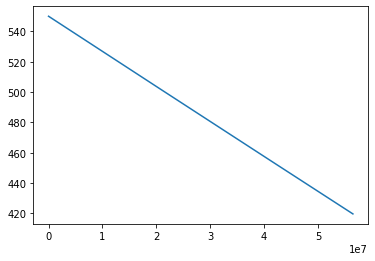

In [19]:
plt.plot(times,heights)